In [1]:
# o - attention 1-lookback 3-basic

DATASET_PATH = 'dataset'
JSON_PATH = "dataWithoutSplit.json"
CSV_PATH = "synthesized_data.csv"

import json
import os
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import pandas
from sklearn.preprocessing import MinMaxScaler
import graphviz
import matplotlib.pyplot as plot
from mlxtend.evaluate import bias_variance_decomp
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report as cr
import warnings
warnings.filterwarnings('ignore')


<AxesSubplot:title={'center':'Class distribution (1: attention, 2: lookback, 3: basic)'}, xlabel='labelNumber', ylabel='count'>

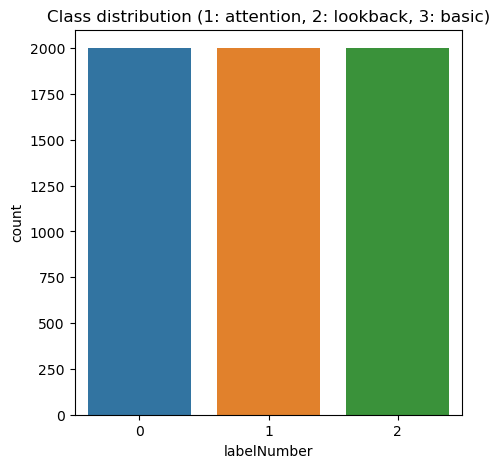

In [2]:
data = pandas.read_csv(CSV_PATH)

plt.figure(figsize=(5,5))
plt.title('Class distribution (1: attention, 2: lookback, 3: basic)')
locs, labels = plt.xticks()
sns.countplot(data['labelNumber'])

In [3]:
data.head()

Unnamed: 0  className  labelNumber       team1      team2      team3  \
0           0  attention            0 -498.665741  83.109169 -30.259417   
1           1  attention            0 -476.663330  82.105118 -24.104553   
2           2  attention            0 -529.847168  86.491402 -24.984060   
3           3  attention            0 -631.438660  80.335251 -16.984324   
4           4  attention            0 -626.568970  77.151192  -0.324651   

       team4      team5      team6      team7     team8      team9     team10  \
0  52.240368   6.806450  20.035704  -5.933654 -5.396043 -14.646782   1.849133   
1  51.684361  -0.993514  17.874949  -9.169041 -4.210441 -10.831435  -1.849361   
2  55.849483   7.208803  13.386753 -10.948857 -1.609862 -11.182072  -5.103657   
3  50.073727  15.060728   7.652650  -7.188329 -2.989441  -5.838862  -3.541614   
4  45.900536  10.895945   9.168003 -10.627774 -5.324921  -9.052401 -13.032470   

      team11    team12    team13  
0 -21.175945  3.895017 -2.381305  
1 -18.593950  4.982050 -7.021472  
2 -16.039398 -1.681687 -3.429657  
3 -12.093223 -3.900585 -2.288800  
4 -11.148601  1.114645 -6.684738

In [4]:
data.shape

(6000, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   6000 non-null   int64  
 1   className    6000 non-null   object 
 2   labelNumber  6000 non-null   int64  
 3   team1        6000 non-null   float64
 4   team2        6000 non-null   float64
 5   team3        6000 non-null   float64
 6   team4        6000 non-null   float64
 7   team5        6000 non-null   float64
 8   team6        6000 non-null   float64
 9   team7        6000 non-null   float64
 10  team8        6000 non-null   float64
 11  team9        6000 non-null   float64
 12  team10       6000 non-null   float64
 13  team11       6000 non-null   float64
 14  team12       6000 non-null   float64
 15  team13       6000 non-null   float64
dtypes: float64(13), int64(2), object(1)
memory usage: 750.1+ KB


In [6]:
data.describe()

Unnamed: 0  labelNumber        team1        team2        team3  \
count  6000.000000  6000.000000  6000.000000  6000.000000  6000.000000   
mean   2999.500000     1.000000  -515.591166    79.966536   -21.928143   
std    1732.195139     0.816565    79.299714     8.443504     8.384016   
min       0.000000     0.000000 -1068.870239    18.227592   -49.864746   
25%    1499.750000     0.000000  -548.850143    75.857937   -26.753121   
50%    2999.500000     1.000000  -506.704117    80.225006   -22.629642   
75%    4499.250000     2.000000  -462.330315    84.502380   -16.990954   
max    5999.000000     2.000000  -340.203156   129.219147    28.438620   

             team4        team5        team6        team7        team8  \
count  6000.000000  6000.000000  6000.000000  6000.000000  6000.000000   
mean     48.661907     3.710703    15.661422   -11.124909    -6.670620   
std       9.227277     6.814888     4.779341     6.285163     5.145261   
min     -14.069610   -21.726038    -7.953528   -31.751415   -24.388517   
25%      44.328208    -0.678749    12.802155   -15.124854   -10.216357   
50%      49.397333     3.761864    16.173878   -10.879813    -7.252737   
75%      53.949477     7.930716    18.846410    -6.822220    -4.146297   
max      77.858864    42.884819    29.510424    15.645594    33.352146   

             team9       team10       team11       team12       team13  
count  6000.000000  6000.000000  6000.000000  6000.000000  6000.000000  
mean    -13.893739    -2.623839   -11.453648     0.101688    -5.736394  
std       5.094734     5.558540     7.524641     5.585405     4.875907  
min     -28.749130   -20.551359   -28.085232   -28.828930   -30.703447  
25%     -17.350517    -6.272240   -17.383826    -3.748097    -8.741627  
50%     -14.279363    -2.543987   -12.139521    -0.203606    -5.648937  
75%     -10.954999     1.004490    -6.062619     3.665083    -2.816029  
max      42.296265    45.640995    33.099659    50.065243    50.817112

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

Unnamed: 0     0
className      0
labelNumber    0
team1          0
team2          0
team3          0
team4          0
team5          0
team6          0
team7          0
team8          0
team9          0
team10         0
team11         0
team12         0
team13         0
dtype: int64

In [9]:
def bar_plot(variable):
      
    # get feature 
    var = data[variable]
    # count number of feature 
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize=(5,5))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

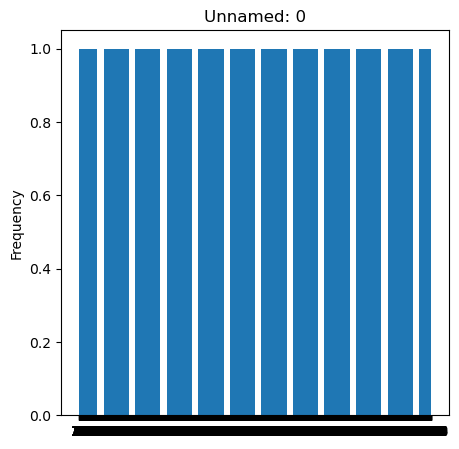

Unnamed: 0:
0       1
3997    1
4006    1
4005    1
4004    1
       ..
1997    1
1996    1
1995    1
1994    1
5999    1
Name: Unnamed: 0, Length: 6000, dtype: int64


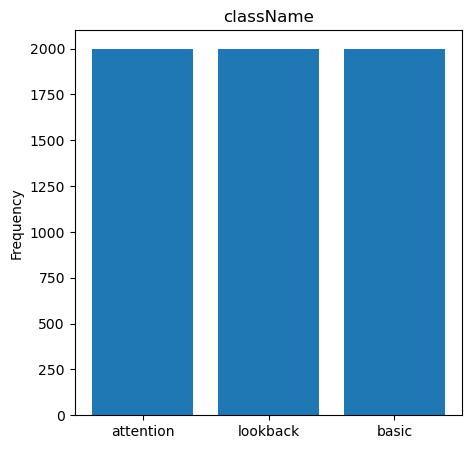

className:
attention    2000
lookback     2000
basic        2000
Name: className, dtype: int64


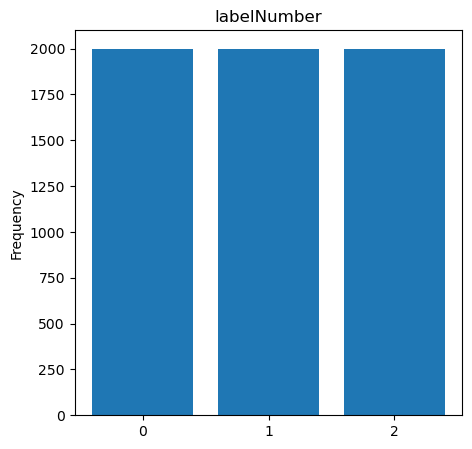

labelNumber:
0    2000
1    2000
2    2000
Name: labelNumber, dtype: int64


In [10]:
team = ['Unnamed: 0','className','labelNumber']
for c in team:
    bar_plot(c)

In [11]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data[variable], bins=15)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

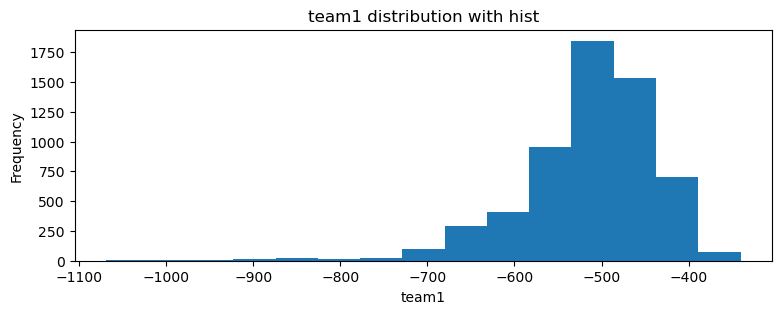

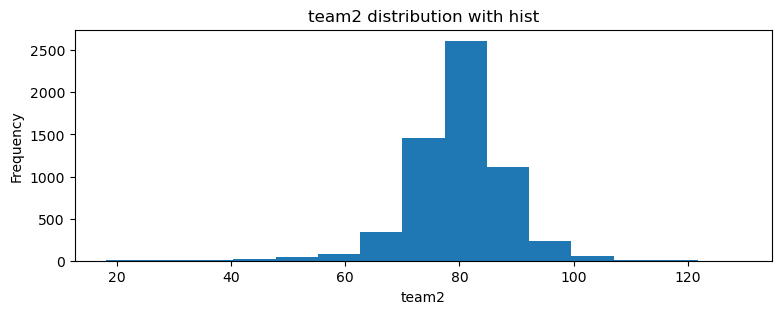

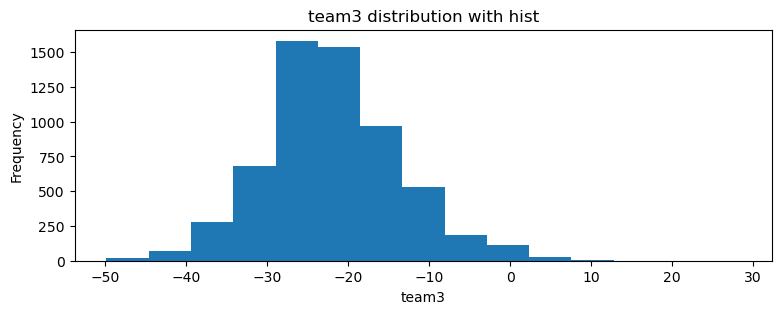

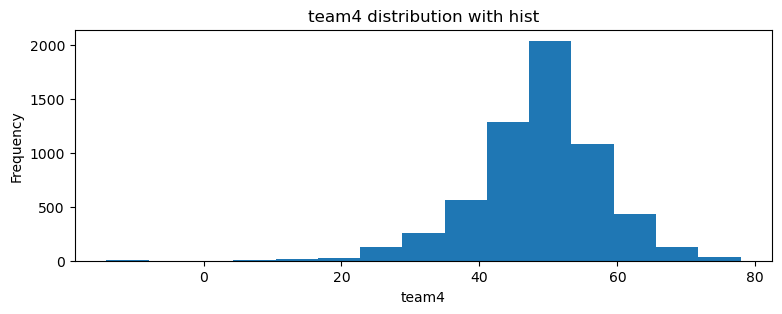

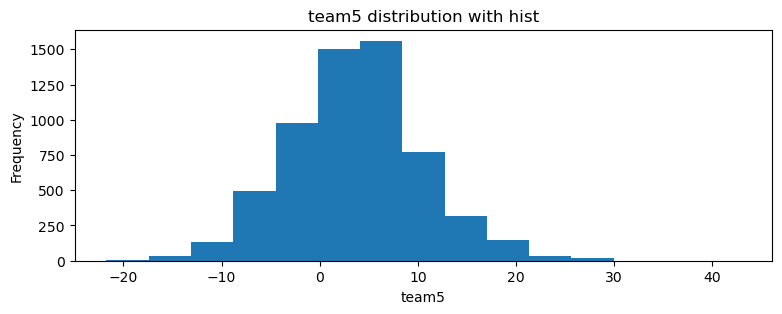

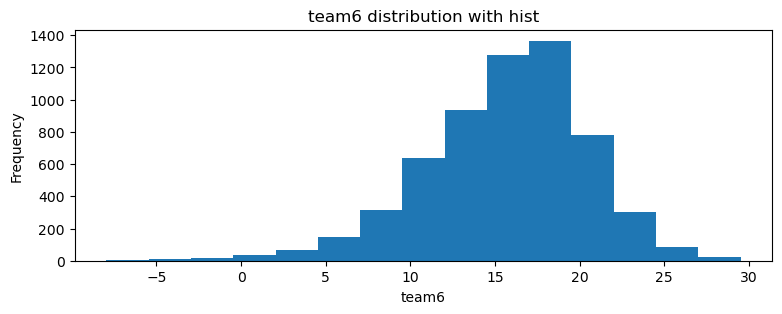

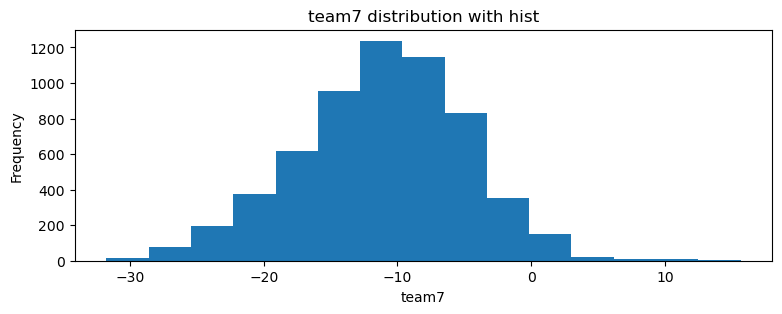

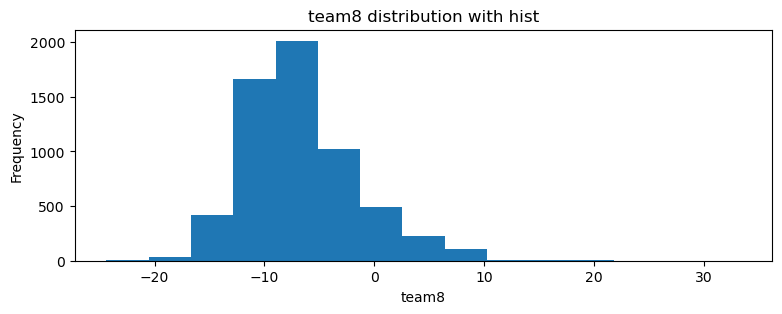

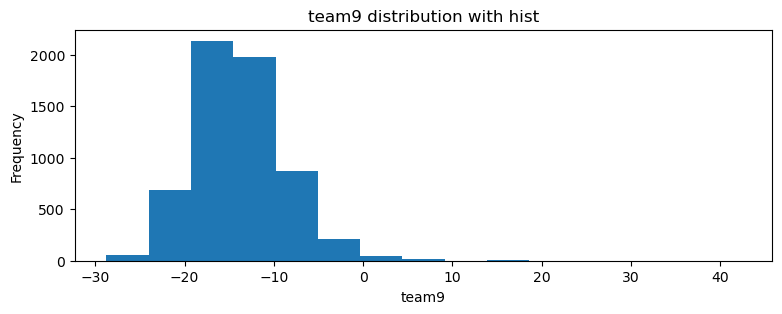

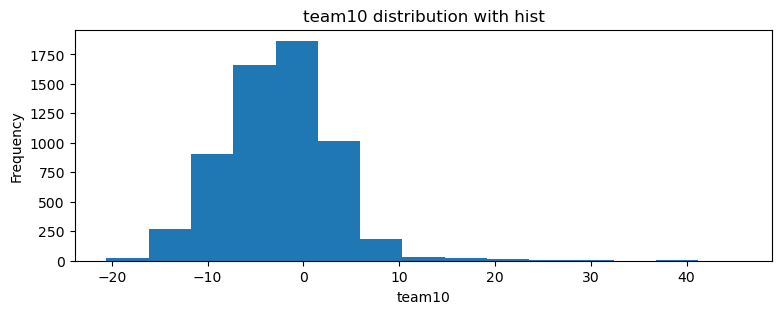

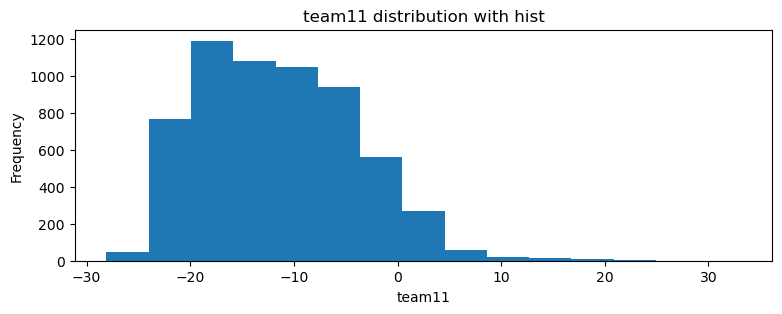

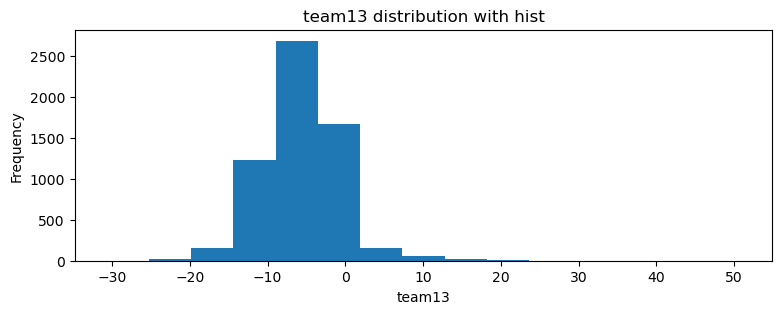

In [12]:
team = ['team1','team2','team3','team4','team5','team6','team7','team8','team9','team10','team11','team13']
for c in team:
    plot_hist(c)

In [13]:
def box_plot(x1):
    sns.boxplot(x=x1, data=data,palette="Paired")
    plt.show()

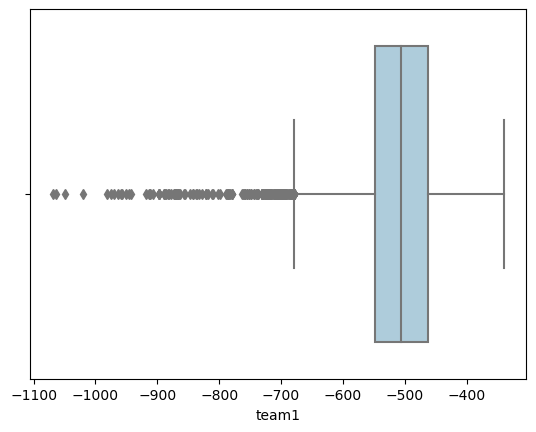

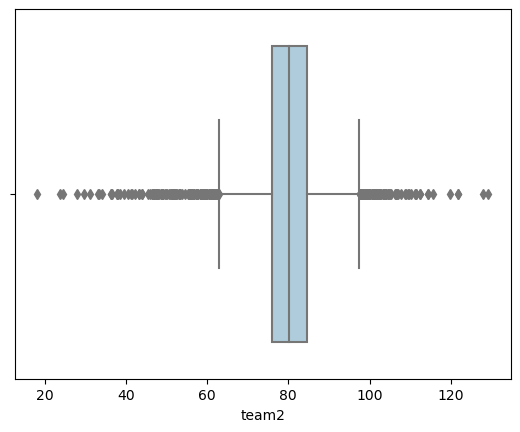

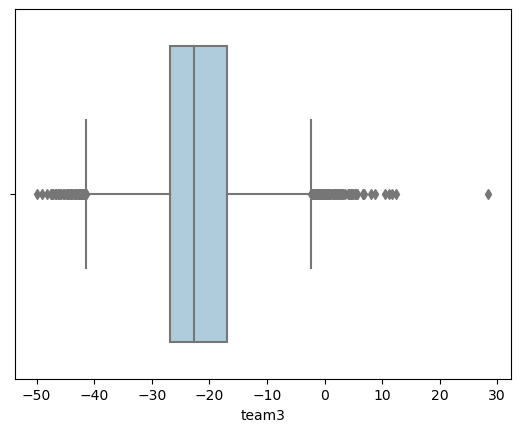

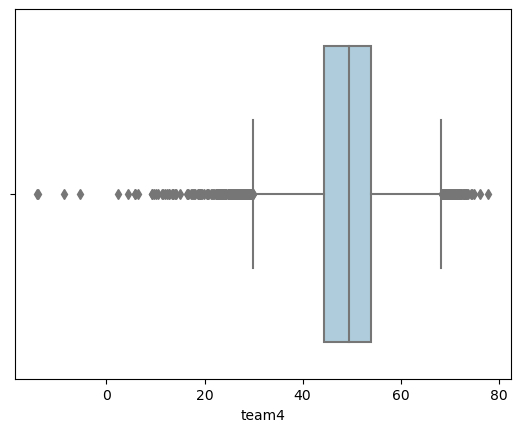

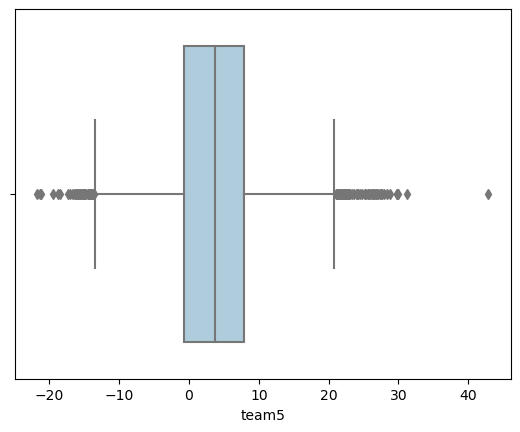

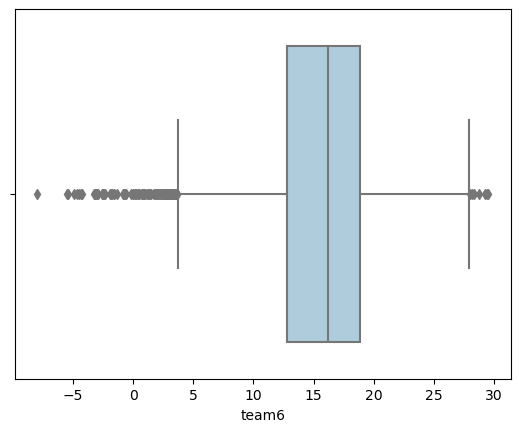

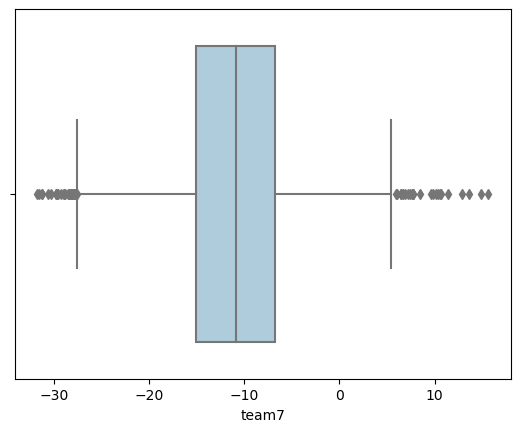

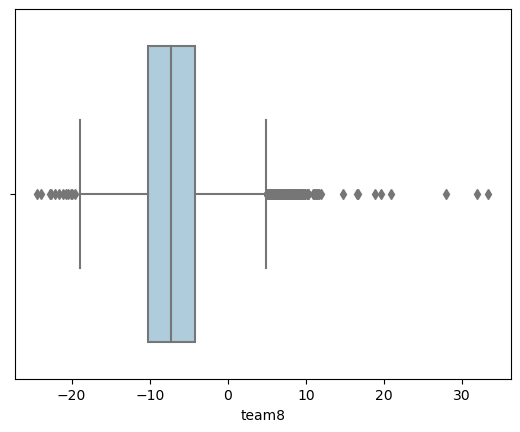

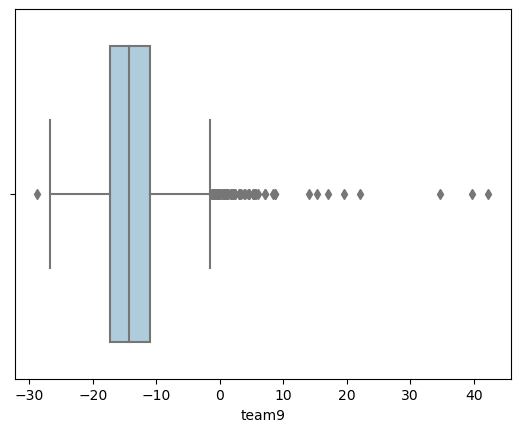

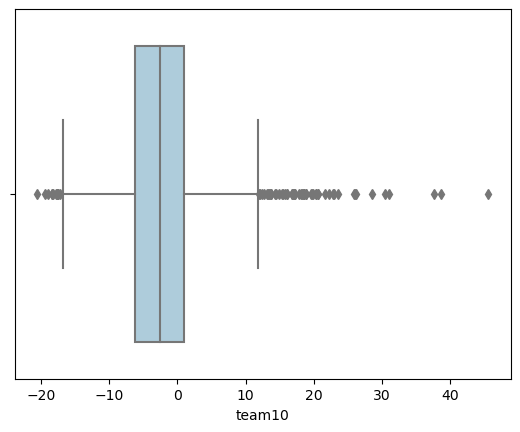

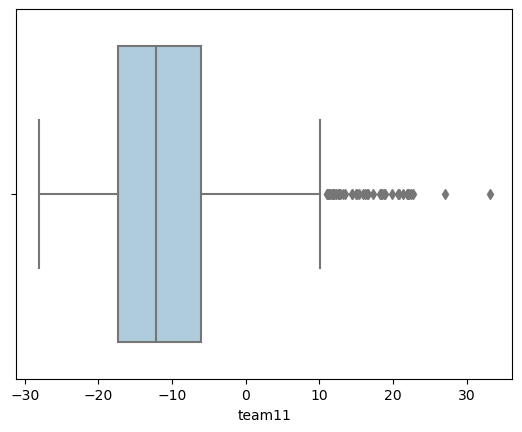

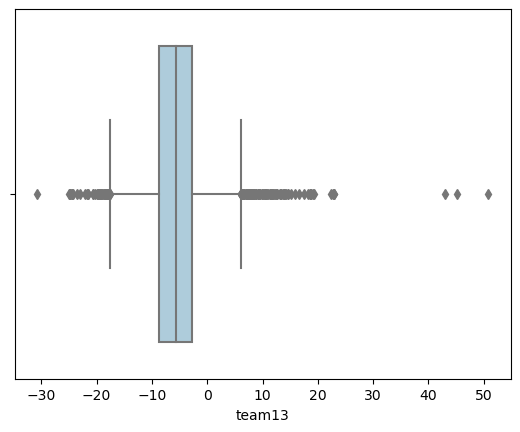

In [14]:
for i in team:
    box_plot(i)

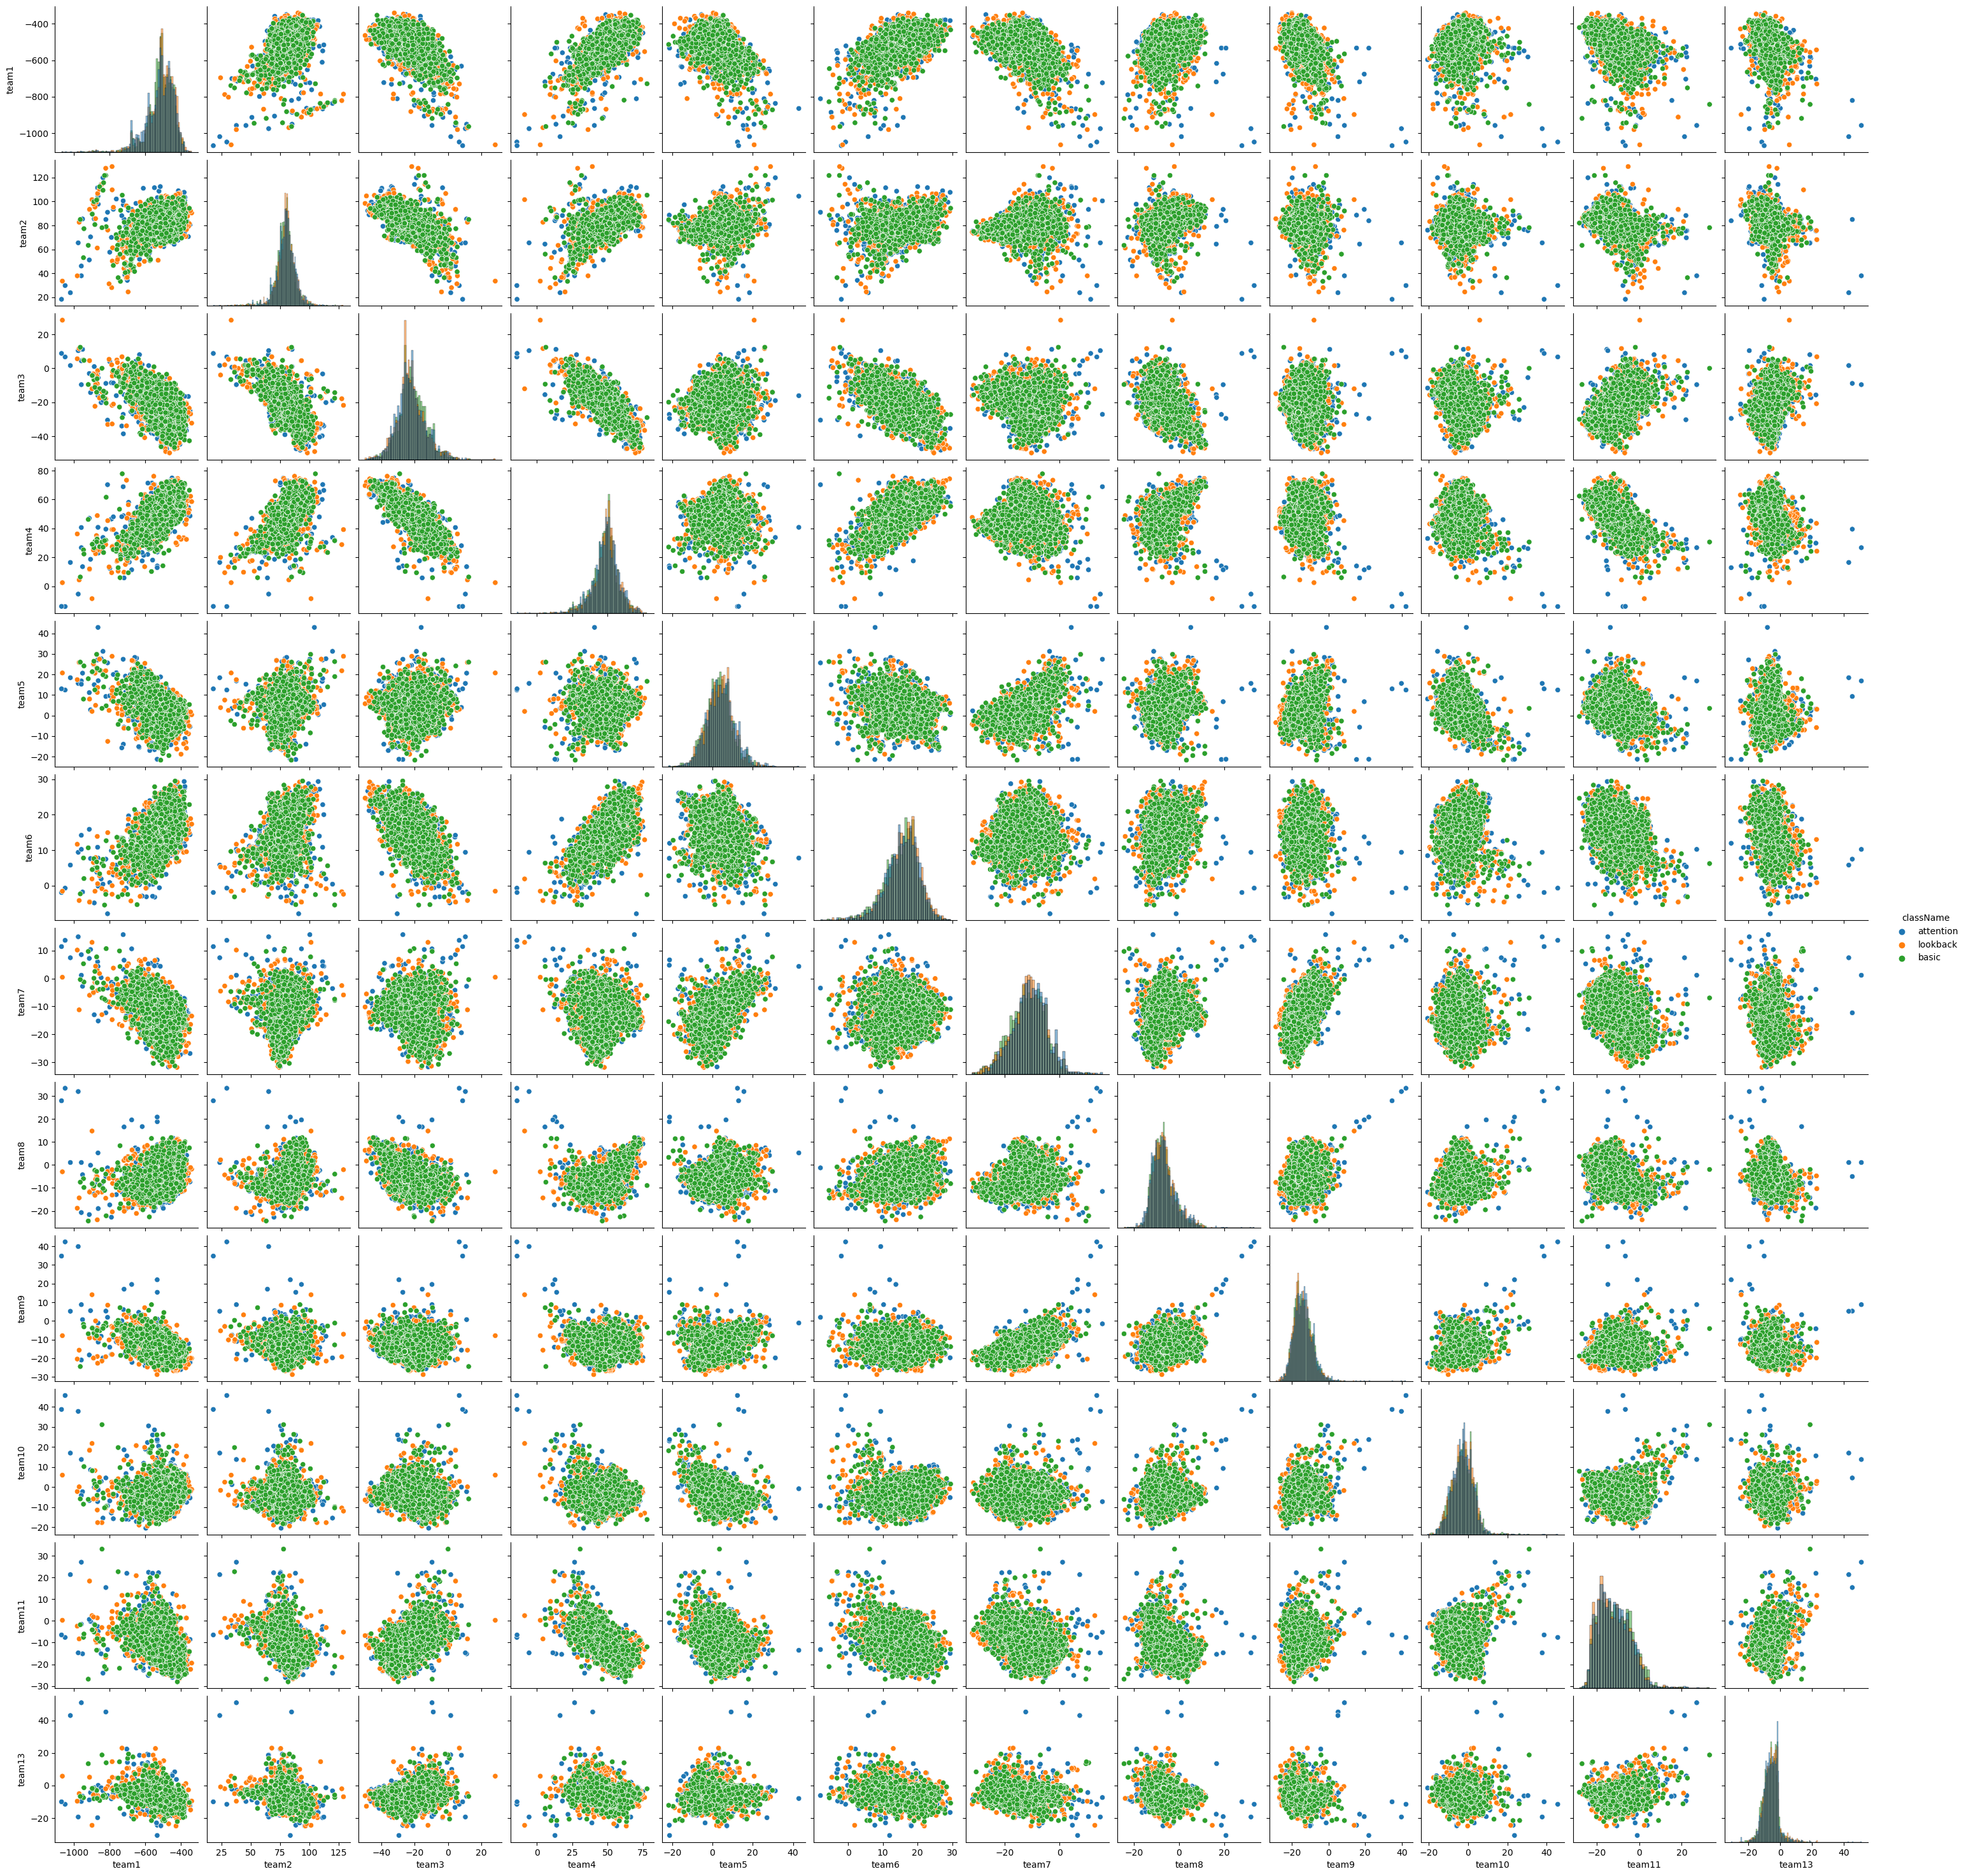

In [15]:
sns.pairplot(data, hue="className", kind = 'scatter', vars = ['team1','team2','team3','team4','team5','team6','team7','team8','team9','team10','team11','team13'],diag_kind = 'hist')

In [16]:
data.corr()

Unnamed: 0  labelNumber     team1     team2     team3     team4  \
Unnamed: 0     1.000000     0.942809  0.019347 -0.032844  0.057996 -0.024402   
labelNumber    0.942809     1.000000  0.017260 -0.027565  0.049891 -0.023563   
team1          0.019347     0.017260  1.000000  0.329202 -0.597529  0.673292   
team2         -0.032844    -0.027565  0.329202  1.000000 -0.645027  0.542778   
team3          0.057996     0.049891 -0.597529 -0.645027  1.000000 -0.796649   
team4         -0.024402    -0.023563  0.673292  0.542778 -0.796649  1.000000   
team5         -0.059303    -0.060700 -0.467507  0.184983  0.071756 -0.075634   
team6         -0.013342    -0.015196  0.572226  0.203956 -0.595002  0.649323   
team7         -0.093722    -0.077840 -0.426527  0.128053 -0.137356 -0.036362   
team8         -0.035375    -0.023827  0.195503  0.299960 -0.488347  0.451932   
team9         -0.043857    -0.024452 -0.487431 -0.114594  0.037139 -0.135074   
team10        -0.016984    -0.001772  0.112393 -0.037500 -0.253185  0.018005   
team11         0.036813     0.035402 -0.395102 -0.450842  0.518118 -0.585475   
team12         0.033296     0.042082  0.062145 -0.002962  0.066394 -0.057392   
team13        -0.022816    -0.028043 -0.309368 -0.080188  0.140380 -0.148346   

                team5     team6     team7     team8     team9    team10  \
Unnamed: 0  -0.059303 -0.013342 -0.093722 -0.035375 -0.043857 -0.016984   
labelNumber -0.060700 -0.015196 -0.077840 -0.023827 -0.024452 -0.001772   
team1       -0.467507  0.572226 -0.426527  0.195503 -0.487431  0.112393   
team2        0.184983  0.203956  0.128053  0.299960 -0.114594 -0.037500   
team3        0.071756 -0.595002 -0.137356 -0.488347  0.037139 -0.253185   
team4       -0.075634  0.649323 -0.036362  0.451932 -0.135074  0.018005   
team5        1.000000 -0.236977  0.614266  0.162553  0.171801 -0.298894   
team6       -0.236977  1.000000  0.055206  0.196786 -0.068626  0.171967   
team7        0.614266  0.055206  1.000000  0.235638  0.446085  0.130349   
team8        0.162553  0.196786  0.235638  1.000000  0.263428  0.181864   
team9        0.171801 -0.068626  0.446085  0.263428  1.000000  0.258284   
team10      -0.298894  0.171967  0.130349  0.181864  0.258284  1.000000   
team11      -0.306800 -0.388541 -0.400826 -0.390171  0.084272 -0.097180   
team12      -0.108606  0.052857  0.181185 -0.005452 -0.142119  0.370685   
team13       0.289949 -0.209629  0.182999 -0.039387 -0.076764  0.018305   

               team11    team12    team13  
Unnamed: 0   0.036813  0.033296 -0.022816  
labelNumber  0.035402  0.042082 -0.028043  
team1       -0.395102  0.062145 -0.309368  
team2       -0.450842 -0.002962 -0.080188  
team3        0.518118  0.066394  0.140380  
team4       -0.585475 -0.057392 -0.148346  
team5       -0.306800 -0.108606  0.289949  
team6       -0.388541  0.052857 -0.209629  
team7       -0.400826  0.181185  0.182999  
team8       -0.390171 -0.005452 -0.039387  
team9        0.084272 -0.142119 -0.076764  
team10      -0.097180  0.370685  0.018305  
team11       1.000000 -0.212409 -0.053471  
team12      -0.212409  1.000000  0.403186  
team13      -0.053471  0.403186  1.000000

<AxesSubplot:>

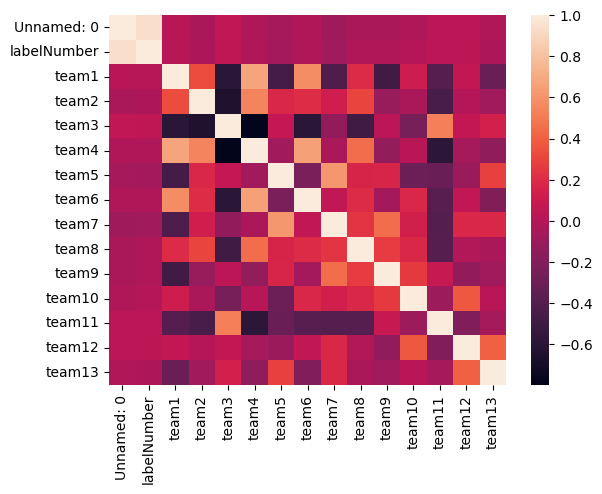

In [17]:
sns.heatmap(data.corr())

In [18]:

scaler = MinMaxScaler() 
Xlist = [data['team1'],data['team2'],data['team3'],data['team4'],data['team5'],data['team6'],data['team7'],data['team8'],data['team9'],data['team10'],data['team11'],data['team12'],data['team13']]
Xlist = scaler.fit_transform(Xlist)
yTrueList = data['labelNumber']
X = np.array(Xlist)
X= X.T
Y = np.array(yTrueList)
Y = Y.T


X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, shuffle = 'true',random_state= 8)

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state= 8) #0.25*8

print("Number of training examples: " + str(len(X_train)))
print("Number of testing examples: " + str(len(X_test)))
#print("Number of validation examples: " + str(len(X_val)))


Number of training examples: 4800
Number of testing examples: 1200


In [19]:
def runLogisticRegression():
    print("------------LOG REG-------------------")
    #Logistic regression
    logisticRegr = LogisticRegression()
    modelLog = logisticRegr.fit(X_train, y_train)
    predictLog = modelLog.predict(X_test)
    print("%0.2f accuracy for logistic regression" % accuracy_score(y_test, predictLog) )
    print(cr(y_test,predictLog))
    cm = confusion_matrix(y_test, predictLog)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title('Confusion matrix for Logistic regression ')
    plt.show()

------------LOG REG-------------------
0.39 accuracy for logistic regression
              precision    recall  f1-score   support

           0       0.39      0.33      0.35       396
           1       0.40      0.41      0.41       415
           2       0.38      0.43      0.40       389

    accuracy                           0.39      1200
   macro avg       0.39      0.39      0.39      1200
weighted avg       0.39      0.39      0.39      1200



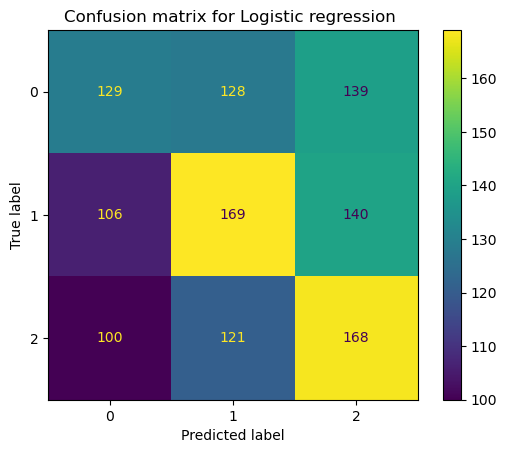

In [20]:
if __name__ == "__main__":
    

    runLogisticRegression()

In [24]:
def runDTreeWithoutPruning():
    print("------------DTREE-------------------") # noise in data , stronger learner
    #Dtree
    scikitDescTree = tree.DecisionTreeClassifier(criterion="gini")
    dtreemodel = scikitDescTree.fit(X_train, y_train)
    #predictsDTree = scikitDescTree.predict(X_val)
    print("Depth of the Dtree(without pruning) learned: "+str(dtreemodel.get_depth()))
    print("training accuarcy of dTREE(without pruning): "+str(dtreemodel.score(X_train, y_train)))
    print("feature Importances : ")
    print(scikitDescTree.feature_importances_)
    valscore = crossValidation(scikitDescTree)
    print("Accuracy of the Dtree(without pruning) learned: " + str(valscore))
    print("-------------------------------")
    #Speculate DTree
#     dot_data = tree.export_graphviz(scikitDescTree, out_file=None)
#     graph = graphviz.Source(dot_data)
#     graph.format = 'png'
#     graph.render("DTree Structure")
    plot.show()
    return dtreemodel.get_depth()


In [25]:
if __name__ == "__main__":
    

    
    depth = runDTreeWithoutPruning()


------------DTREE-------------------
Depth of the Dtree(without pruning) learned: 28
training accuarcy of dTREE(without pruning): 0.9860416666666667
feature Importances : 
[0.         0.         0.11406603 0.07869968 0.10515698 0.09712595
 0.07745942 0.08198323 0.07065425 0.09575626 0.09138327 0.09739744
 0.0903175 ]
Accuracy of the Dtree(without pruning) learned: 0.38979166666666665
-------------------------------


In [27]:
def dtreeAnalysis(maxdepth):
    
    print("------------DTREE ANALYSIS-------------------")
    dtreeTrainAccuracies = []
    dtreeValAccuracies = []
    depths = []
    for depth in range(1,27):
        print(" for depth"+ str(depth))
        scikitDescTree = tree.DecisionTreeClassifier(criterion="gini",max_depth=depth)
        dtreemodel = scikitDescTree.fit(X_train, y_train)
        #predictsDTree = scikitDescTree.predict(X_val)
        trainScore = dtreemodel.score(X_train, y_train)
        print("training accuarcy of dTREE : "+str(trainScore))
        dtreeTrainAccuracies.append(trainScore*100)
        validationScore = crossValidation(dtreemodel)
        print("validation accuarcy of dTREE : "+str(validationScore))
        dtreeValAccuracies.append(validationScore*100)
        depths.append(depth)
    
    plt.figure()
    plt.plot(depths, dtreeValAccuracies , marker='o')
    plt.plot(depths, dtreeTrainAccuracies, marker='s')
    plt.xlabel('depth', fontsize= 10)
    plt.ylabel('Validation/train accuracy', fontsize= 10)
    plt.legend(['Validation accuracy', 'Training accuracy'], fontsize=10)
    plt.title('Tuning depth for dTree')
    #plt.axis([2, 25, 15, 60])

------------DTREE ANALYSIS-------------------
 for depth1
training accuarcy of dTREE : 0.355625
validation accuarcy of dTREE : 0.34479166666666666
 for depth2
training accuarcy of dTREE : 0.38166666666666665
validation accuarcy of dTREE : 0.37083333333333335
 for depth3
training accuarcy of dTREE : 0.39416666666666667
validation accuarcy of dTREE : 0.37583333333333335
 for depth4
training accuarcy of dTREE : 0.41354166666666664
validation accuarcy of dTREE : 0.37354166666666666
 for depth5
training accuarcy of dTREE : 0.431875
validation accuarcy of dTREE : 0.3772916666666667
 for depth6
training accuarcy of dTREE : 0.45166666666666666
validation accuarcy of dTREE : 0.374375
 for depth7
training accuarcy of dTREE : 0.4870833333333333
validation accuarcy of dTREE : 0.38104166666666667
 for depth8
training accuarcy of dTREE : 0.5279166666666667
validation accuarcy of dTREE : 0.385
 for depth9
training accuarcy of dTREE : 0.570625
validation accuarcy of dTREE : 0.3858333333333333
 for dep

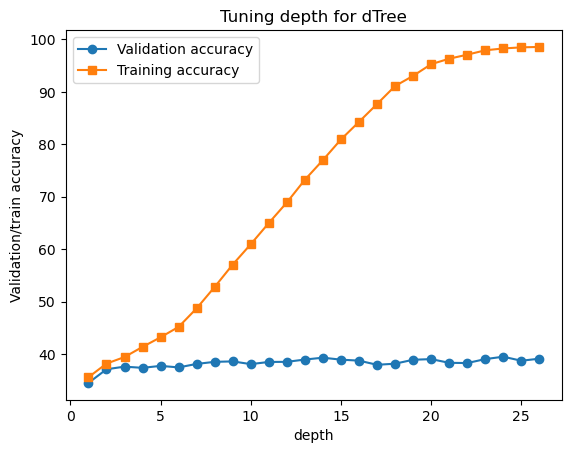

In [28]:
if __name__ == "__main__":
    

    
    dtreeAnalysis(depth)

In [29]:
def knnAnalysis():
    print("------------KNN-------------------")
    #Import knearest neighbors Classifier model
    knnTrainAccuracies = []
    knnValAccuracies = []
    newK = []
    for i in range (1 ,25): #480
      #Create KNN Clas n_neighbors = i
      print("k value:" + str(i))
      knn = KNeighborsClassifier(i)
      knn.fit(X_train, y_train)
      print("training accuarcy of knnmodel : "+str(knn.score(X_train, y_train)))
      knnTrainAccuracies.append(knn.score(X_train, y_train)*100)
      #knn_y_pred = knn.predict(X_val)
      valScore = crossValidation(knn)
      print("validation accuracy scores of knn : "+ str(valScore))
      knnValAccuracies.append(valScore*100)
      newK.append(i)
     
    plt.figure()
    plt.plot(newK, knnValAccuracies , marker='o')
    plt.plot(newK, knnTrainAccuracies, marker='s')
    plt.xlabel('K values')
    plt.ylabel('Validation/train accuracy')
    plt.legend(['Validation accuracy', 'train accuracy'])
    plt.title('Tuning k for K-NN')
    

------------KNN-------------------
k value:1
training accuarcy of knnmodel : 0.9852083333333334
validation accuracy scores of knn : 0.40750000000000003
k value:2
training accuarcy of knnmodel : 0.696875
validation accuracy scores of knn : 0.39791666666666664
k value:3
training accuarcy of knnmodel : 0.67375
validation accuracy scores of knn : 0.39770833333333333
k value:4
training accuarcy of knnmodel : 0.6345833333333334
validation accuracy scores of knn : 0.40354166666666663
k value:5
training accuarcy of knnmodel : 0.6072916666666667
validation accuracy scores of knn : 0.4008333333333334
k value:6
training accuarcy of knnmodel : 0.5877083333333334
validation accuracy scores of knn : 0.4
k value:7
training accuarcy of knnmodel : 0.571875
validation accuracy scores of knn : 0.4016666666666667
k value:8
training accuarcy of knnmodel : 0.5535416666666667
validation accuracy scores of knn : 0.39916666666666667
k value:9
training accuarcy of knnmodel : 0.5535416666666667
validation accura

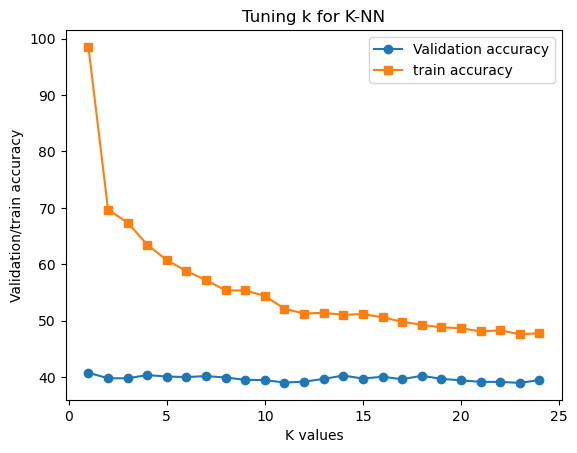

In [30]:
if __name__ == "__main__":
    

    
    knnAnalysis()
    

In [31]:
def crossValidation(model):
    scores = cross_val_score(model, X_train, y_train, cv=10)
    return scores.mean()
    

In [32]:
def runRandomTreeClassifier():
    # vary depth 1 to 26  and number of estimators 10 to 100
    print("------------Random Tree Classifier-------------------")
    
    depths=[]
    rf_trainaccuracy = []
    rf_valaccuracy = []
    for depth in range(1,28,2):
        print("depth : " + str(depth))
        depths.append(depth)
        rf_depth = RandomForestClassifier(max_depth=depth,n_estimators=100,random_state=0)
        rf_depth.fit(X_train,y_train)
        print("training accuarcy of Random Forest : "+str(rf_depth.score(X_train, y_train)))
        rf_trainaccuracy.append(rf_depth.score(X_train, y_train)*100)
        valScore = crossValidation(rf_depth)
        print("validation accuracy scores of Random Forest : "+ str(valScore))
        rf_valaccuracy.append(valScore*100)
    
    plt.figure()
    plt.plot(depths, rf_valaccuracy , marker='o')
    plt.plot(depths, rf_trainaccuracy, marker='s')
    plt.xlabel('RF depth values')
    plt.ylabel('Validation/train accuracy')
    plt.legend(['Validation accuracy', 'train accuracy'])
    plt.title('Tuning maxdepth for Random Forest')
    
# =============================================================================
#     # lets fix the depth = 6  validation accuracy scores  : 0.4008333333333334 
#     nof_trainaccuracy = []
#     nof_valaccuracy = []
#     no_of_estimators = []
#     for i in range (10 ,160,10):
#         no_of_estimators.append(i)
#         nof = RandomForestClassifier(max_depth = 6,n_estimators= i,random_state=0)
#         nof.fit(X_train,y_train)
#         print("training accuarcy of Random Forest : "+str(nof.score(X_train, y_train)))
#         nof_trainaccuracy.append(nof.score(X_train, y_train)*100)
#         valScore = crossValidation(nof)
#         print("validation accuracy scores of Random Forest : "+ str(valScore))
#         nof_valaccuracy.append(valScore*100)
#         
#     plt.figure()
#     plt.plot(no_of_estimators, nof_valaccuracy , marker='o')
#     plt.plot(no_of_estimators, nof_trainaccuracy, marker='s')
#     plt.xlabel('RF no of estimator values')
#     plt.ylabel('Validation/train accuracy')
#     plt.legend(['Validation accuracy', 'train accuracy'])
#     
# =============================================================================
    # after no of estimator = 60 almost linear let' fix no of estimators = 100
    
    # trail
    
    depth = 27 
    no_of_est = 100
    rf = RandomForestClassifier(max_depth = depth,n_estimators= no_of_est,random_state=0)
    rf.fit(X_train,y_train)
    print("training accuarcy of Random Forest trail : "+str(rf.score(X_train, y_train)))
    #nof_trainaccuracy.append(rf.score(X_train, y_train)*100)
    valScore = crossValidation(rf)
    print("validation accuracy scores of Random Forest 5trail: "+ str(valScore))
    

------------Random Tree Classifier-------------------
depth : 1
training accuarcy of Random Forest : 0.3854166666666667
validation accuracy scores of Random Forest : 0.37020833333333336
depth : 3
training accuarcy of Random Forest : 0.4275
validation accuracy scores of Random Forest : 0.37958333333333333
depth : 5
training accuarcy of Random Forest : 0.49833333333333335
validation accuracy scores of Random Forest : 0.38791666666666663
depth : 7
training accuarcy of Random Forest : 0.6327083333333333
validation accuracy scores of Random Forest : 0.39895833333333336
depth : 9
training accuarcy of Random Forest : 0.7852083333333333
validation accuracy scores of Random Forest : 0.403125
depth : 11
training accuarcy of Random Forest : 0.8991666666666667
validation accuracy scores of Random Forest : 0.4110416666666666
depth : 13
training accuarcy of Random Forest : 0.95875
validation accuracy scores of Random Forest : 0.4102083333333333
depth : 15
training accuarcy of Random Forest : 0.97729

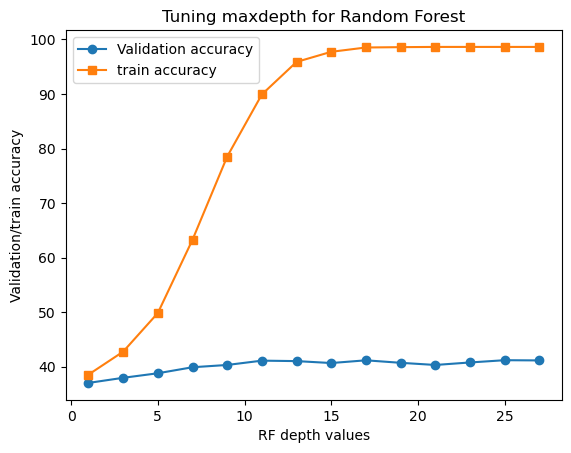

In [33]:
if __name__ == "__main__":
    

    
    runRandomTreeClassifier()

In [34]:
def letsBagKNNClassifier():
    
    print("------------Baggin KNN Classifier-------------------")
    k_s=[]
    bagofknn_trainaccuracy = []
    bagofknn_valaccuracy = []
    
    for k in range(1,25,2):
        print("k : " + str(k)) 
        k_s.append(k)
        clf = BaggingClassifier(KNN(n_neighbors= k, weights='uniform', algorithm='auto', leaf_size=10, p=1, metric='minkowski', metric_params=None, n_jobs=1))
        clf.fit(X_train, y_train)
        bagofknn_trainaccuracy.append(clf.score(X_train, y_train))
        print("training accuarcy of KNN bags : "+str(clf.score(X_train, y_train)))
        valScore = crossValidation(clf)
        print("validation accuracy scores of KNN bags : "+ str(valScore))
        bagofknn_valaccuracy.append(valScore)
    
    plt.figure()
    plt.plot(k_s, bagofknn_valaccuracy , marker='o')
    plt.plot(k_s, bagofknn_trainaccuracy, marker='s')
    plt.xlabel('Bag of KNN depth values')
    plt.ylabel('Validation/train accuracy')
    plt.legend(['Validation accuracy', 'train accuracy'])
    plt.title('Tuning n_neighbours for Bag of KNN')
    
    k=4
    clf1 = BaggingClassifier(KNN(n_neighbors= k, weights='uniform', algorithm='auto', leaf_size=10, p=1, metric='minkowski', metric_params=None, n_jobs=1))
    clf1.fit(X_train, y_train)
    print("training accuarcy of KNN trial bags : "+str(clf1.score(X_train, y_train)))
    valScore = crossValidation(clf1)
    print("validation accuracy scores of KNN trial bags : "+ str(valScore))
    

------------Baggin KNN Classifier-------------------
k : 1
training accuarcy of KNN bags : 0.928125
validation accuracy scores of KNN bags : 0.40562499999999996
k : 3
training accuarcy of KNN bags : 0.72875
validation accuracy scores of KNN bags : 0.3995833333333333
k : 5
training accuarcy of KNN bags : 0.633125
validation accuracy scores of KNN bags : 0.39979166666666666
k : 7
training accuarcy of KNN bags : 0.5889583333333334
validation accuracy scores of KNN bags : 0.40437499999999993
k : 9
training accuarcy of KNN bags : 0.5595833333333333
validation accuracy scores of KNN bags : 0.39187500000000003
k : 11
training accuarcy of KNN bags : 0.53125
validation accuracy scores of KNN bags : 0.39229166666666665
k : 13
training accuarcy of KNN bags : 0.518125
validation accuracy scores of KNN bags : 0.39125
k : 15
training accuarcy of KNN bags : 0.503125
validation accuracy scores of KNN bags : 0.39437500000000003
k : 17
training accuarcy of KNN bags : 0.4979166666666667
validation accura

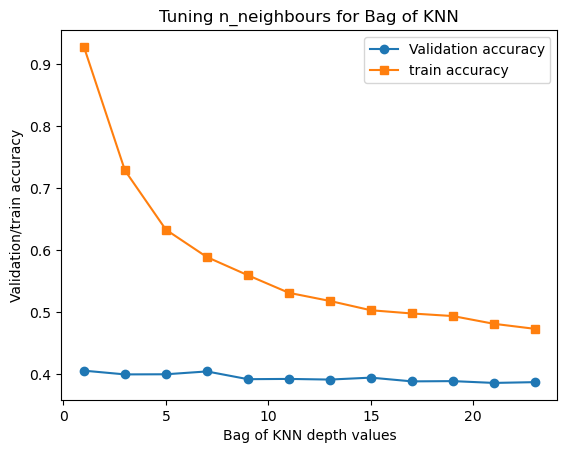

In [35]:
if __name__ == "__main__":
    

    
    letsBagKNNClassifier()

In [40]:
def svmClassifier():
    print("----- SVM Tuning --------")
    param_grid = { 'C':[0.1,1,100,1000],'kernel':['poly'],'degree':[1,2,3,4]}
    grid = GridSearchCV(SVC(),param_grid)
    grid.fit(X_train,y_train)
    print("training accuarcy of SVC trial : "+str(grid.score(X_train, y_train)))
    print(grid.best_params_)
    valScore = crossValidation(grid)
    print("validation accuracy scores of SVC trial  : "+ str(valScore))
    

In [ ]:
if __name__ == "__main__":
    

    
    svmClassifier()


----- SVM Tuning --------


In [38]:
    
def modelTestPerformance():
    print("------------Test Performance-------------------")
    #k value:8
    #training accuarcy of knnmodel : 0.5436111111111112
    #validation accuracy scores of knn : 0.39138888888888884
    knn = KNeighborsClassifier(8)
    knn.fit(X_train, y_train)
    knnpredictTest = knn.predict(X_test)
    KNNtest_accuracy = accuracy_score(y_test, knnpredictTest)
   
    print("------------KNN with k=8 Performance-------------------")
    print("%0.2f accuracy KNN with k=8"% KNNtest_accuracy )
    print(cr(y_test,knnpredictTest))
    
    cm1 = confusion_matrix(y_test, knnpredictTest)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
    disp.plot()
    plt.title('Confusion matrix for KNN with k =8 ')
    plt.show()
    #for depth6
    #training accuarcy of dTREE : 0.4513888888888889
    #validation accuarcy of dTREE : 0.38027777777777777
    pruneAt = 7
    scikitDescTree = tree.DecisionTreeClassifier(criterion="gini",max_depth= pruneAt)
    dtreemodel = scikitDescTree.fit(X_train, y_train)
    dtreePredictTest = dtreemodel.predict(X_test)
    dtreetest_accuracy = accuracy_score(y_test, dtreePredictTest)
    
    print("------------ Dtree with depth=7 Performance-------------------")
    print("%0.2f accuracy for dTree with depth =  7" % dtreetest_accuracy )
    print(cr(y_test,dtreePredictTest))
    
    cm2 = confusion_matrix(y_test, dtreePredictTest)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
    disp.plot()
    plt.title('Confusion matrix for Dtree with depth = 7')
    plt.show()
    #depth : 27
    #training accuarcy of Random Forest : 0.9888888888888889
    #validation accuracy scores of Random Forest : 0.40138888888888885
    depth = 10
    no_of_est = 100
    rf = RandomForestClassifier(max_depth = depth,n_estimators= no_of_est,random_state=0)
    rf.fit(X_train,y_train)
    rfpredicty = rf.predict(X_test)
    rftestaccuracy = accuracy_score(y_test,rfpredicty)
    
    print("------------ Random Forest with depth=27 Performance-------------------")
    print("%0.2f accuracy for RF with depth = 27 " % rftestaccuracy )
    print(cr(y_test,rfpredicty))
 
    cm3 = confusion_matrix(y_test, rfpredicty)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm3)
    disp.plot()
    plt.title('Confusion matrix for Random Forest with depth = 27')
    plt.show()
    #k : 3
    #training accuarcy of KNN bags : 0.7277777777777777
    #validation accuracy scores of KNN bags : 0.41083333333333333
    
    k=3
    clf1 = BaggingClassifier(KNN(n_neighbors= k, weights='uniform', algorithm='auto', leaf_size=10, p=1, metric='minkowski', metric_params=None, n_jobs=1))
    clf1.fit(X_train, y_train)
    kPredictY = clf1.predict(X_test)
    knnAccuracy = accuracy_score(y_test,kPredictY)
    
    print("------------ Bag of KNN Forest with k=3 Performance-------------------")
    print("%0.2f accuracy for knn bag k =3" % knnAccuracy )
    print(cr(y_test,kPredictY))
    
    cm4 = confusion_matrix(y_test, kPredictY)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm4)
    disp.plot()
    plt.title('Confusion matrix for bag of KNN with k = 3')
    plt.show()
    
    
    


------------Test Performance-------------------
------------KNN with k=8 Performance-------------------
0.39 accuracy KNN with k=8
              precision    recall  f1-score   support

           0       0.38      0.45      0.41       396
           1       0.43      0.40      0.41       415
           2       0.37      0.33      0.35       389

    accuracy                           0.39      1200
   macro avg       0.39      0.39      0.39      1200
weighted avg       0.39      0.39      0.39      1200



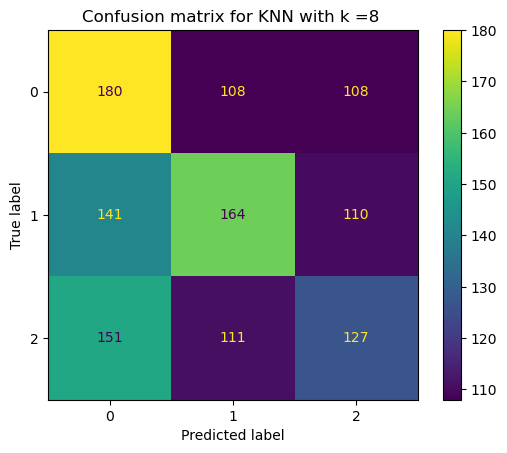

------------ Dtree with depth=7 Performance-------------------
0.36 accuracy for dTree with depth =  7
              precision    recall  f1-score   support

           0       0.36      0.54      0.43       396
           1       0.36      0.29      0.32       415
           2       0.37      0.25      0.30       389

    accuracy                           0.36      1200
   macro avg       0.36      0.36      0.35      1200
weighted avg       0.36      0.36      0.35      1200



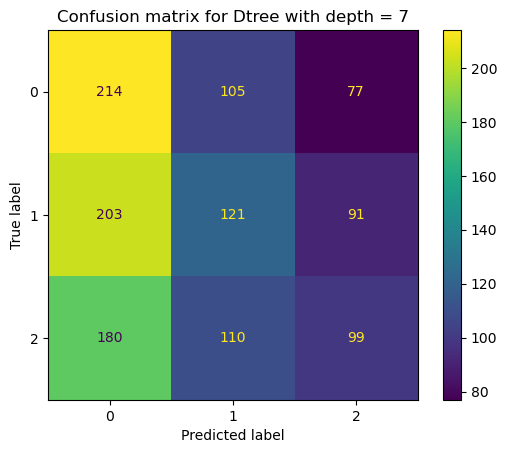

------------ Random Forest with depth=27 Performance-------------------
0.38 accuracy for RF with depth = 27 
              precision    recall  f1-score   support

           0       0.37      0.38      0.37       396
           1       0.39      0.33      0.36       415
           2       0.37      0.42      0.39       389

    accuracy                           0.38      1200
   macro avg       0.38      0.38      0.38      1200
weighted avg       0.38      0.38      0.38      1200



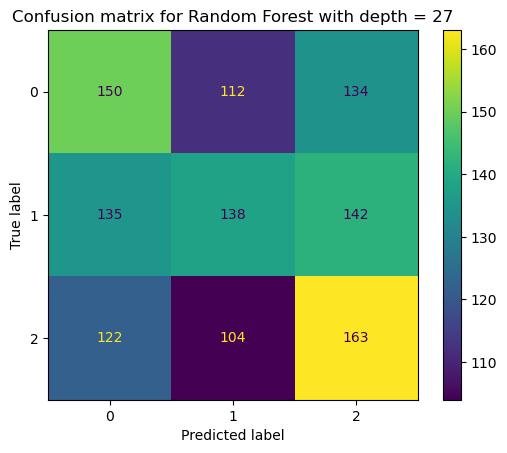

------------ Bag of KNN Forest with k=3 Performance-------------------
0.39 accuracy for knn bag k =3
              precision    recall  f1-score   support

           0       0.40      0.39      0.39       396
           1       0.38      0.39      0.39       415
           2       0.38      0.38      0.38       389

    accuracy                           0.39      1200
   macro avg       0.39      0.39      0.39      1200
weighted avg       0.39      0.39      0.39      1200



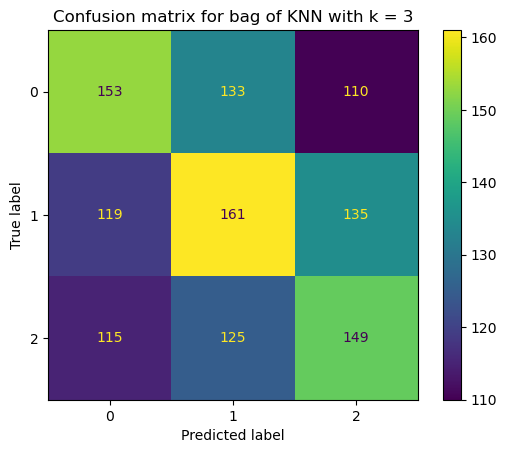

In [39]:
if __name__ == "__main__":
    

    
    modelTestPerformance()